In [1]:
# importer les packages
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import numpy as np

import cufflinks as cf

In [2]:
debut=dt.datetime(2017,1,1)
fin=dt.datetime(2021,5,24)
tickers=['TSLA']
df=web.DataReader(tickers, 'yahoo', debut,fin)
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2017-01-03,43.397999,43.397999,44.066002,42.192001,42.972000,29616500.0
2017-01-04,45.397999,45.397999,45.599998,42.862000,42.950001,56067500.0
2017-01-05,45.349998,45.349998,45.495998,44.389999,45.284000,29558500.0
2017-01-06,45.801998,45.801998,46.062000,45.090000,45.386002,27639500.0
2017-01-09,46.256001,46.256001,46.383999,45.599998,45.793999,19897500.0


In [3]:
cf.set_config_file(offline=True)

In [4]:
df.normalize().iplot(kind='lines')

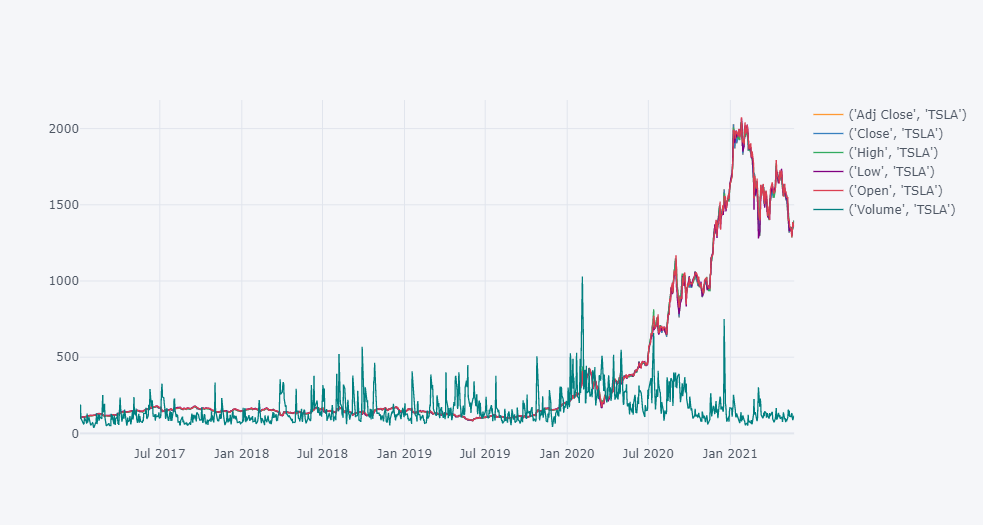

In [5]:
df['Close'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1105 entries, 2017-01-03 to 2021-05-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    1105 non-null   float64
dtypes: float64(1)
memory usage: 17.3 KB


# MOYENNE MOBILE DE TESLA

In [6]:
#calculer la moyenne sur 10 et 100 jours
MC=50
ML=100
df['MC']=df['Close'].rolling(MC).mean()
df['ML']=df['Close'].rolling(ML).mean()
df.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume,MC,ML
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,
Date,,,,,,,,
2021-05-18,577.869995,577.869995,596.250000,563.380005,568.000000,36830600.0,673.711798,724.018098
2021-05-19,563.460022,563.460022,566.210022,546.979980,552.549988,39578400.0,671.509398,723.192899
2021-05-20,586.780029,586.780029,588.849976,571.070007,575.000000,30821100.0,669.883799,722.442999
2021-05-21,580.880005,580.880005,596.679993,580.000000,596.109985,25943600.0,667.509399,721.614899
2021-05-24,606.440002,606.440002,614.479980,573.650024,581.599976,34558100.0,665.763600,721.019399


In [7]:
df.dropna(inplace=True)

In [8]:
df[['Close','MC','ML']].normalize().iplot()

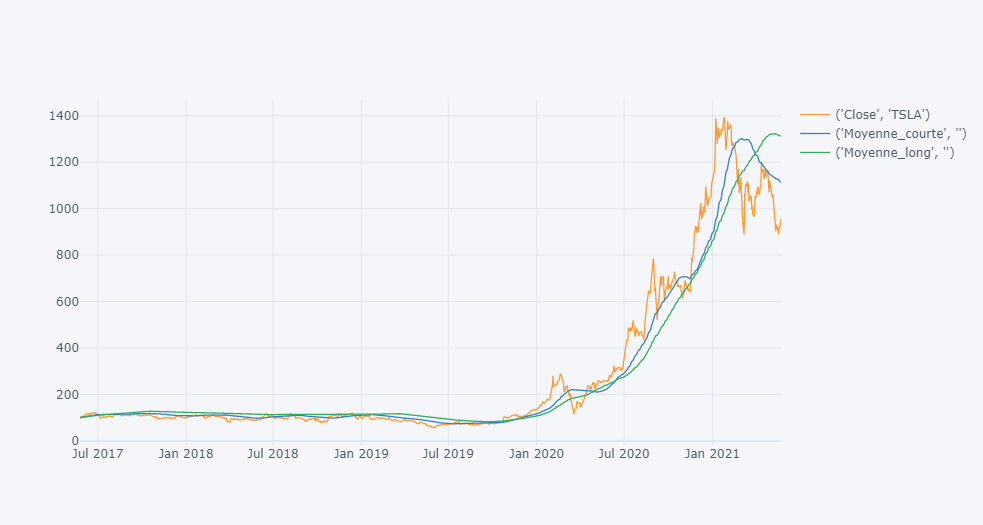

In [10]:
df['Positions']=np.where(df['MC']>df['ML'],1,-1)

In [11]:
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume,MC,ML,Positions
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,,
2017-05-25,63.366001,63.366001,63.394001,61.562000,62.203999,25070000.0,59.77224,54.97442,1
2017-05-26,65.028000,65.028000,65.098000,63.262001,63.456001,39011000.0,60.02460,55.19072,1
2017-05-30,67.019997,67.019997,67.255997,65.152000,65.199997,38914500.0,60.31900,55.40694,1
2017-05-31,68.202003,68.202003,68.578003,67.031998,67.538002,49817000.0,60.63536,55.63546,1
2017-06-01,68.073997,68.073997,68.975998,67.458000,68.800003,38040000.0,60.99412,55.85818,1


In [12]:
df.dropna(inplace=True)

In [13]:
df[['Close','MC','ML','Positions']].normalize().iplot()

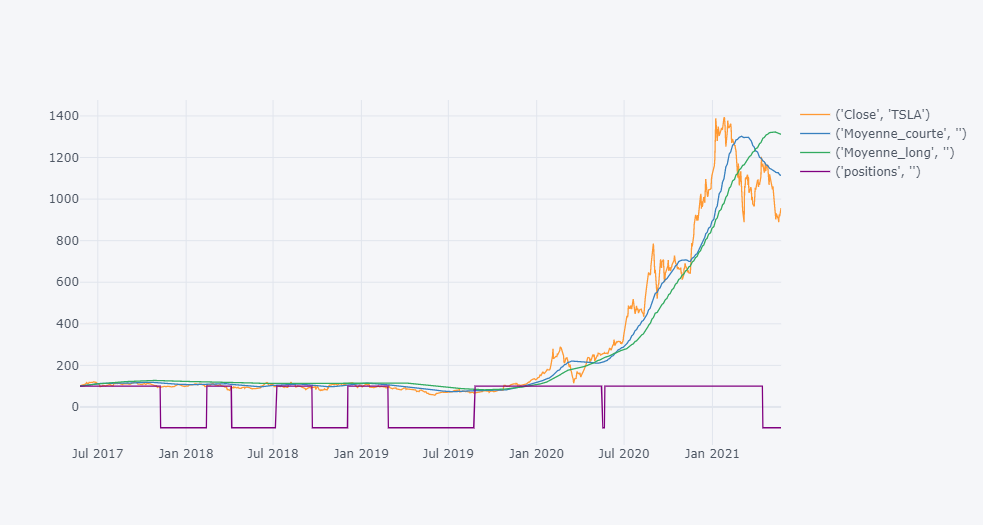

In [14]:
df['rendements']=np.log((df['Close']/df['Close'].shift(1)))

In [15]:
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume,MC,ML,Positions,rendements
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,
Date,,,,,,,,,,
2017-05-25,63.366001,63.366001,63.394001,61.562000,62.203999,25070000.0,59.77224,54.97442,1,NaN
2017-05-26,65.028000,65.028000,65.098000,63.262001,63.456001,39011000.0,60.02460,55.19072,1,0.025890
2017-05-30,67.019997,67.019997,67.255997,65.152000,65.199997,38914500.0,60.31900,55.40694,1,0.030173
2017-05-31,68.202003,68.202003,68.578003,67.031998,67.538002,49817000.0,60.63536,55.63546,1,0.017483
2017-06-01,68.073997,68.073997,68.975998,67.458000,68.800003,38040000.0,60.99412,55.85818,1,-0.001879


In [16]:
df.dropna(inplace=True)

In [17]:
df['Strategy']=df['Positions'].shift(1)*df['rendements']

In [18]:
np.exp(df[['rendements','Strategy']].sum())

Attributes  Symbols
rendements              9.570432
Strategy               14.138373
dtype: float64

In [19]:
df[['rendements', 'Strategy']].cumsum().apply(np.exp).iplot()

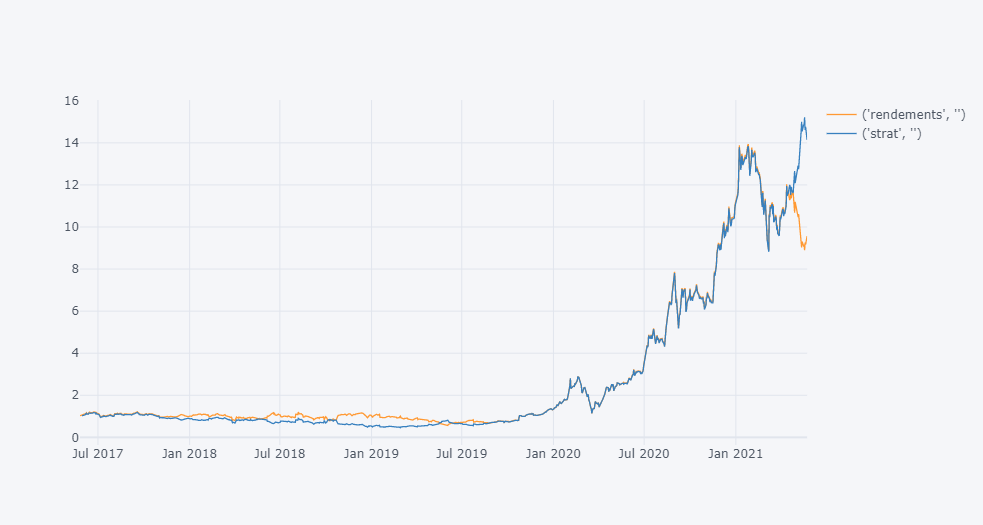

# COMMENTAIRE DE LA STRATEGIE

- On constate que de 2017  à septembre 2019, notre stratégie est défaillante car le rendements de l'actif est légèrement supérieur au rendement de notre stratégie. 
- A partir de début septembre 2019, il y a aucune différence entre détenir l'actif ou utiliser notre stratégie. Cependant durant cette période(sept 2019- 16 avril 2021), il serait mieux de détenir l'actif car notre stratégie est caractérisée par des vagues d'achats et de ventes ce qui peut nous côuter cher en terme de commissions.
- Notre stratégie est réellement gagnante à partir de mi avril 2021 car on short TESLA